<a href="https://colab.research.google.com/github/lutvimurdiansyah/SLO/blob/main/valid__cs_batch_image_Selada_uv_modify_hasil_rekonstruksi_6Des23_coba2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/python-baru/python

/content/drive/MyDrive/Colab Notebooks/python-baru/python


In [4]:
!pip install alive_progress
!pip install progressbar
!pip list | grep progress
from scipy.io import savemat,loadmat
import scipy.io
import numpy as np
import os
from PIL import Image
import time
import sys
from alive_progress import alive_bar
from progressbar import bar

resolusi=256

folder='/content/drive/MyDrive/Colab Notebooks/python-baru/Selada uv modify'

files=os.listdir(folder)
kelas=-1*np.ones((len(files),1))

toolbar_width = len(files)
img_rz=np.ones((toolbar_width,resolusi,resolusi,3))

# for i in bar.progressbar (range(toolbar_width), "Proses Membaca File: ", 85):
for i in range(toolbar_width):
    j=i/(toolbar_width-1)*100
    if files[i][0]=='b':
        kelas[i,0]=0
    elif files[i][0]=='g':
        kelas[i,0]=1
    elif files[i][0]=='j':
        kelas[i,0]=2
    elif files[i][0]=='k':
        kelas[i,0]=3
    elif files[i][0]=='l':
        kelas[i,0]=4
    elif files[i][0]=='o':
        kelas[i,0]=5
    elif files[i][0]=='r':
        kelas[i,0]=6
# print(os.path.join(folder,files{i}))
    image = Image.open(os.path.join(folder,files[i]))
    img_rz[i,:,:,:] = np.float64(np.array(image.resize((resolusi,resolusi))))

print("Jumlah File :"+str(len(files)))
print("Resolusi :"+str(img_rz.shape[1])+"x"+str(img_rz.shape[2])+"x"+str(img_rz.shape[3]))
print("Jumlah Kelas b :"+str(np.sum(kelas==0)))
print("Jumlah Kelas g :"+str(np.sum(kelas==1)))
print("Jumlah Kelas j :"+str(np.sum(kelas==2)))
print("Jumlah Kelas k :"+str(np.sum(kelas==3)))
print("Jumlah Kelas l :"+str(np.sum(kelas==4)))
print("Jumlah Kelas o :"+str(np.sum(kelas==5)))
print("Jumlah Kelas r :"+str(np.sum(kelas==6)))
var1={'Citra':img_rz,'Kelas':kelas,'Resolusi':resolusi}
savemat("datacitra.mat", var1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=1c5b45313653a416157e950590fb345113f3dcdf898bad36cb016b9ac5e93022
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=6ba1538055c9de964acf4f5e7094a3f7f99d2a3e2bb043e848900cf4221ebdc0
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar
alive-progress                   3.1.5
fastprogress                     1.0.3
progressbar                      2.5
progressbar2                     4.2.0
Jumlah File :181

In [5]:
print (os.getcwd())

/content/drive/MyDrive/Colab Notebooks/python-baru/python


In [6]:
print (img_rz.shape)


(181, 256, 256, 3)


In [7]:
%reset -f
import os
print (os.getcwd())
# !pip install recon
# !pip install bar
# !pip install progressbar
!pip install Pillow
from PIL import Image
from numpy import asarray
import numpy as np
from matplotlib import pyplot
from scipy.fftpack import dct
import math as mt
from scipy.fft import dctn, idctn
from scipy.io import savemat,loadmat
import recons
import bar as bar
import progressbar

persen=0.125
windowsize_r = 8
windowsize_c = 8
thr=20

output_folder = 'img_rekons_selada_resize'
datacitra=loadmat("datacitra.mat")
img_rz=datacitra['Citra']
kelas=datacitra['Kelas']
resolusi=datacitra['Resolusi']
L=windowsize_r*windowsize_c
M=round(persen*windowsize_r*windowsize_c)
y=np.ones((M,round(img_rz.shape[1]*img_rz.shape[2]*img_rz.shape[3]/L),img_rz.shape[0]))
ysave=np.ones((img_rz.shape[0],M,round(img_rz.shape[1]*img_rz.shape[2]*img_rz.shape[3]/L)))

img_rr=np.ones((img_rz.shape[0],img_rz.shape[1],img_rz.shape[2],img_rz.shape[3]))
snr=np.ones((1,img_rz.shape[1]*img_rz.shape[2]*img_rz.shape[3]))
print(str(img_rz.shape[3]))
for j in range(0,img_rz.shape[0],1):

    ind=0
    sfile=False
    while sfile==False:
        single=False
        AA=np.random.normal(0,1,(M,L))
        # print("A1="+str(AA))
        md={'A':AA}
        savemat("dataA.mat", md)
        for i in range(0,img_rz.shape[3],1):
#             print(str(i))
            for  r in range(0,img_rz.shape[1] , windowsize_r):
                for c in range(0,img_rz.shape[2] , windowsize_c):
                    w = img_rz[j,r:r+windowsize_r,c:c+windowsize_c,i]
                    wid1=w.reshape(windowsize_r*windowsize_c,1)
                    wd2=dctn(w[:,:])
                    wd=wd2.reshape(windowsize_r*windowsize_c,1)
                    data_dict=loadmat("dataA.mat")
                    AA=data_dict['A']
                    y[0:M,ind:ind+1,j]=np.dot(AA,wd)
                    Y=y[0:M,ind:ind+1,j]
                    ysave[j,0:M,ind:ind+1]=y[0:M,ind:ind+1,j]
                    try:
                        hat_x1=recons.omp(Y,AA)

                    except:
#                         print('Singular')
                        single=True
                        break
                    snr[0,ind]=np.mean(np.mean(wd**2))/np.mean(np.mean((wd-hat_x1.T)**2))
                    hat_xt=hat_x1.reshape(windowsize_r*windowsize_c,1)
                    print(snr[0,ind])
                    ind=ind+1
                    wdir=(hat_x1.T).reshape(windowsize_r,windowsize_c)
                    wid=idctn(wdir)
                    img_rr[j,r:r+windowsize_r,c:c+windowsize_c,i]=wid
                if single==True:
                    break
                if np.sum(snr>10)<thr:
                    break
            if single==True:
                break
            if np.sum(snr>10)<thr:
                break
            else:
                sfile=True
#                 print('True')
# Save the image to the folder
for j in range(len(img_rr)):
    # output_folder = 'img_rr'
    # I0 = img_rz[j,:,:,:].astype(np.uint8)
    I = img_rr[j,:,:,:].astype(np.uint8)
    image_to_save = Image.fromarray(I)
    image_filename = os.path.join(output_folder, f'image_{j}.png')
    image_to_save.save(image_filename)
    # mse=np.mean(np.mean((I-I0)**2))
    # psnr=10*mt.log10(255**2/mse)
    # print("PSNR = "+str(psnr)+" dB")

# print(f"{len(img_rr)} images saved to {output_folder}")
print("Rasio Kompresi ="+str(persen*100)+"%")

# fig, axs = pyplot.subplots(1,2)

# axs[0].imshow(I0)
# axs[0].set_title('Citra Asli')
# axs[1].imshow(I)
# axs[1].set_title('Citra Rek')

# axs[0].plot(wd)
# axs[0].set_title('Citra Asli')
# axs[1].plot(hat_xt)
# axs[1].set_title('Citra Rek')



Output streaming akan dipotong hingga 5000 baris terakhir.
1653.8104268606062
4502.298144736876
10112.94178332601
10240.009672137454
16708.54307261713
52033.643323122815
11357.782811877774
3643.990066891438
4643.325089348796
6324.6759343917065
96.86716574440798
2014.555012056893
1047.0758331873085
1027.1619727703783
165.74261162582334
236.13725999769377
98.7694019215943
308.6371221265378
138.6593631131665
302.7930027648688
162.49205376746824
105.04359049026299
7176.758285171721
29989.526830053623
18373.442899121637
20271.79781073584
13425.485780495428
4677.3110390751835
394.808244042487
216.4081855651298
888.9193518335129
1972.5621242878944
2479.328273619009
8593.318217569176
42836.7576129896
16399.655534307865
25107.501141221932
19874.33959690574
17417.190947709285
3707.603401373817
3083.09022585625
2057.611626347221
326.6380710332568
434.2696125688531
72.99617064421382
398.17840308750726
188.02132297266846
506.1803440812346
1498.9466004120209
5545.734640337545
3061.2531356749237
1121

<ipython-input-7-5d8a4a23240b>:68: RuntimeWarning: invalid value encountered in double_scalars
  snr[0,ind]=np.mean(np.mean(wd**2))/np.mean(np.mean((wd-hat_x1.T)**2))


Output streaming akan dipotong hingga 5000 baris terakhir.
0.641045768495912
0.5281676465549049
0.5669923876813759
0.5505619144214562
0.5433806822518629
0.6259591747508888
0.640163723431344
0.7420996424557326
0.5388283322892837
0.5486508073475822
0.6351189693675002
0.6333909314399806
0.6399396804438479
0.5538152872108904
0.5221405665552699
0.5942636012185061
0.5371280773887298
0.49789539880630074
0.6316670739236852
0.6216000618053851
0.5383338567913121
0.5472420161116167
0.5930019417903719
0.5079848130470009
0.5352202533017736
0.5373106902263065
0.6609083898745597
0.6570206525337415
0.5357893177886349
0.617933369422649
0.5506772683399257
0.5704355213683185
0.5796252421049269
0.5436310815257677
0.5523610385333757
0.6367917515703603
0.6091290474201307
0.5542146504639636
0.5802547382338852
0.5131612423503208
0.5036724350750983
0.5214562369327479
0.6398214842042589
0.6380945462508647
0.6395590016889373
0.6122951089444683
0.5455552225303959
0.543240235310428
0.5691723455735271
0.57540778428

In [8]:
print(img_rr.shape)
print(img_rz.shape)
print(y.shape)
print(ysave.shape)
print(snr.shape)

(181, 256, 256, 3)
(181, 256, 256, 3)
(8, 3072, 181)
(181, 8, 3072)
(1, 196608)


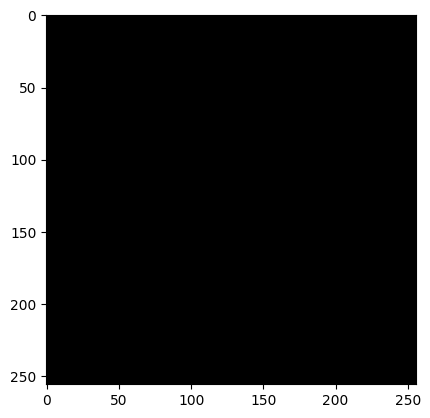

(46, 256, 256, 3)
(135, 256, 256, 3)
(46, 7)
(135, 7)


In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


indices = np.arange(img_rr.shape[0])
# (
#     data_train,
#     data_test,
#     labels_train,
#     labels_test,
#     indices_train,
#     indices_test,
# ) = train_test_split(data, labels, indices, test_size=0.2)


kelas=kelas[0:img_rr.shape[0]]
# x_train, x_test, y_train, y_test,ind_train,ind_test = train_test_split(img_rz, kelas, indices, test_size=.25) #asli
x_train, x_test, y_train, y_test,ind_train,ind_test = train_test_split(img_rr, kelas, indices, test_size=.25) #rekonstruksi
# x_train, x_test, y_train, y_test,ind_train,ind_test = train_test_split(ysave, kelas, indices, test_size=.25) #hasil cs

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# x_train = x_train.reshape(1, resolusi[0,0],resolusi[0,0],3)
# x_test = x_test.reshape(1, resolusi[0,0],resolusi[0,0],3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
norm = np. linalg. norm(x_train)
x_train = x_train/norm
norm = np. linalg. norm(x_test)
x_test = x_test/norm

y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)
# X_test[1,:]
# print(y_train)
# print(x_train.shape)
I0 = x_train.astype(np.uint8)
#   I = img_rr[j,:,:,:].astype(np.uint8)
# plt.imshow(I0[1])
plt.imshow(I0[1])
plt.show()

print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# print(x_train.shape)
#Convolutional Neural Network
# print(resolusi[0])
model2 = Sequential()
# model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(resolusi[0,0],resolusi[0,0],3),padding='same'))
# model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(8,3072,1),padding='same'))
if x_train.ndim==3:
    model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(x_train.shape[1],x_train.shape[2],1),padding='same'))
else:
    model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),padding='same'))

model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(7,activation='softmax'))
# model2.summary()

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(x_train,y_train,epochs=750,batch_size=250,validation_data=(x_test,y_test))#batch size def : 100
model2.save('my_model2.h5')


Epoch 1/750
1/1 [==============================] - 31s 31s/step - loss: 1.9459 - acc: 0.1852 - val_loss: 1.9347 - val_acc: 0.2391
Epoch 2/750
1/1 [==============================] - 16s 16s/step - loss: 1.9351 - acc: 0.2000 - val_loss: 1.8960 - val_acc: 0.2391
Epoch 3/750
1/1 [==============================] - 12s 12s/step - loss: 1.8970 - acc: 0.2000 - val_loss: 1.8956 - val_acc: 0.2391
Epoch 4/750
1/1 [==============================] - 11s 11s/step - loss: 1.9084 - acc: 0.2000 - val_loss: 1.8916 - val_acc: 0.1957
Epoch 5/750
1/1 [==============================] - 7s 7s/step - loss: 1.8964 - acc: 0.1926 - val_loss: 1.8884 - val_acc: 0.1957
Epoch 6/750
1/1 [==============================] - 12s 12s/step - loss: 1.8914 - acc: 0.1926 - val_loss: 1.8879 - val_acc: 0.1957
Epoch 7/750
1/1 [==============================] - 7s 7s/step - loss: 1.8919 - acc: 0.1926 - val_loss: 1.8888 - val_acc: 0.1957
Epoch 8/750
1/1 [==============================] - 10s 10s/step - loss: 1.8941 - acc: 0.1926 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 382ms/step
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 

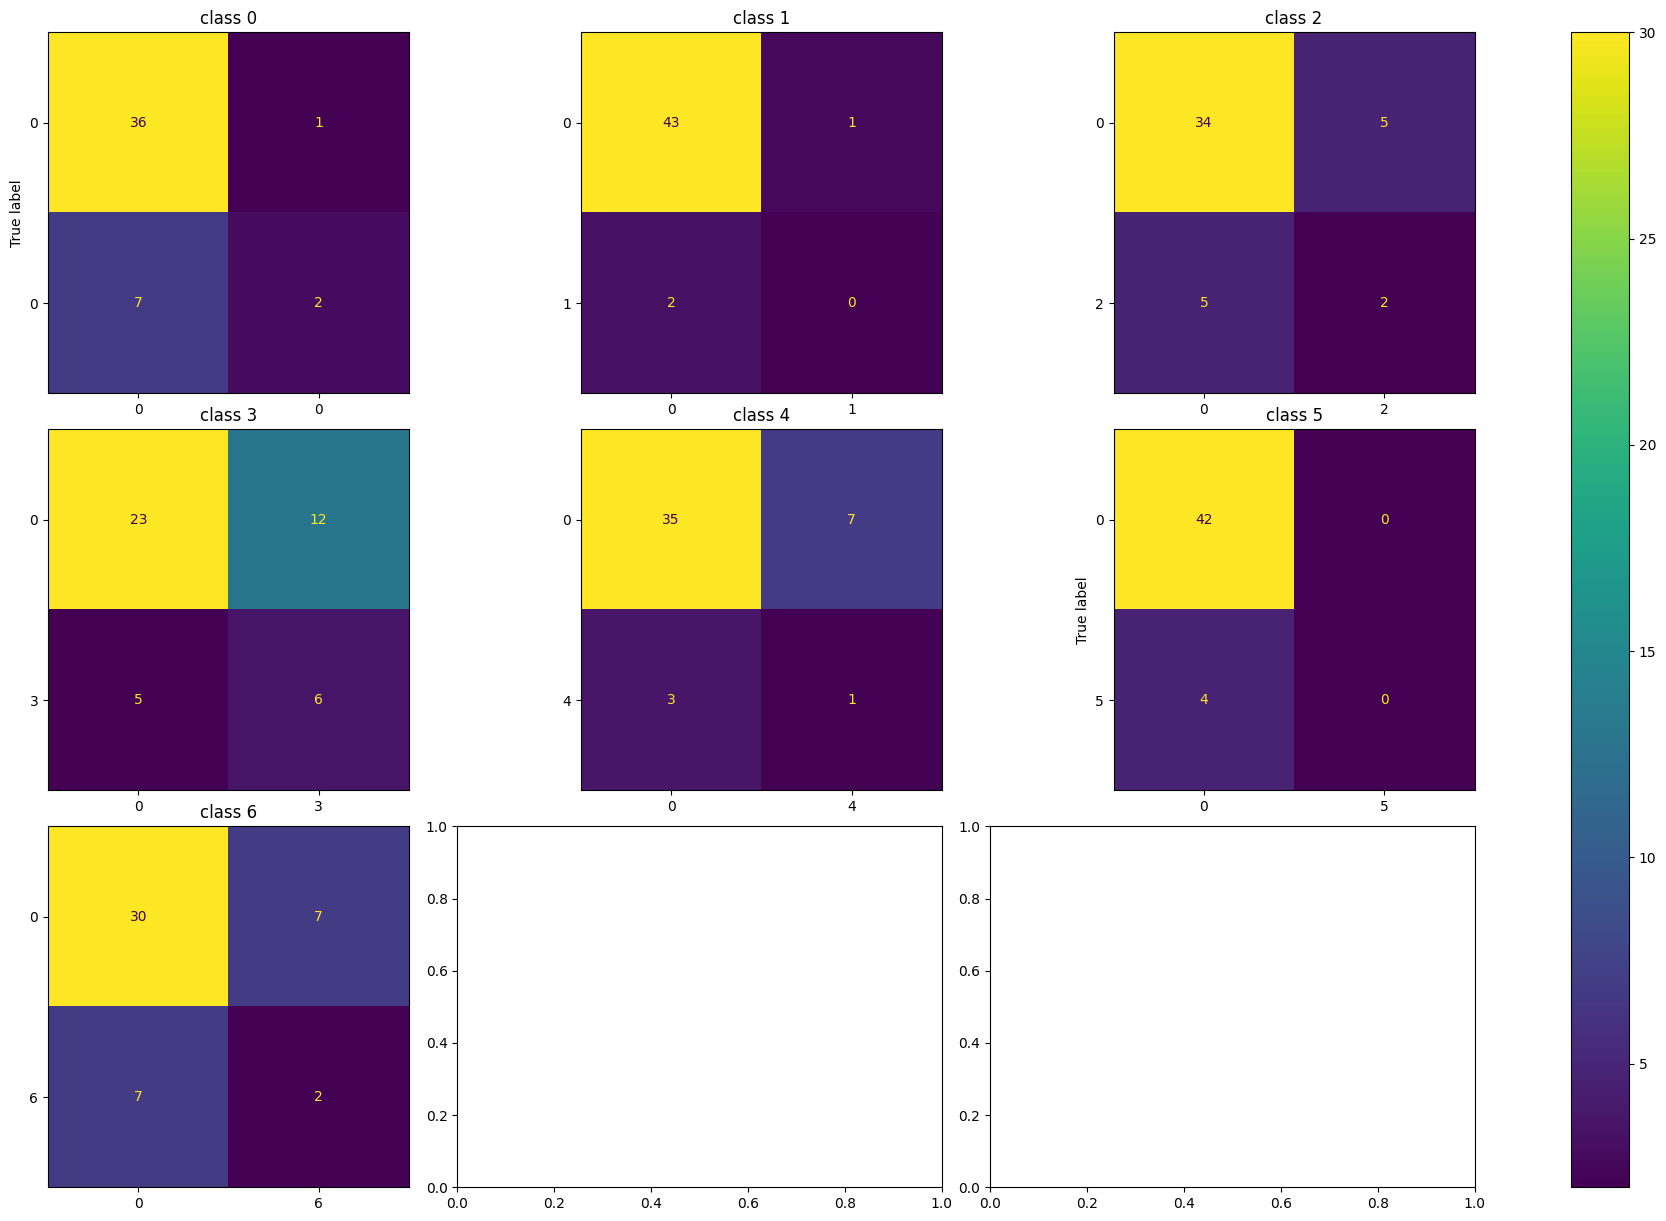

In [11]:
from keras.models import load_model

# print(x_test.shape)
# print(x_train.shape)
# print(y_test.shape)
# print(y_train.shape)

model2save = load_model('my_model2.h5')

y_pred = model2save.predict(x_test)
# print(y_pred.shape)
# print(y_test.shape)
# print(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print('Akurasi Testing CNN:', accuracy)
# plot_confusion_matrix(model2, x_test, y_test)

print(y_test)
print(y_pred)


# y_testb = [np.argmax(y, axis=None, out=None) for y in y_test]
# y_predb = [np.argmax(y, axis=None, out=None) for y in y_pred]

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# print(y_testb)
# print(y_predb)

f, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(7):
    # print(i)
    # disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:,i], y_pred[:,i]), display_labels=[0,i])
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_labels == i, y_pred_labels == i), display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'class {i}')
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()



2/2 [==============================] - 2s 307ms/step


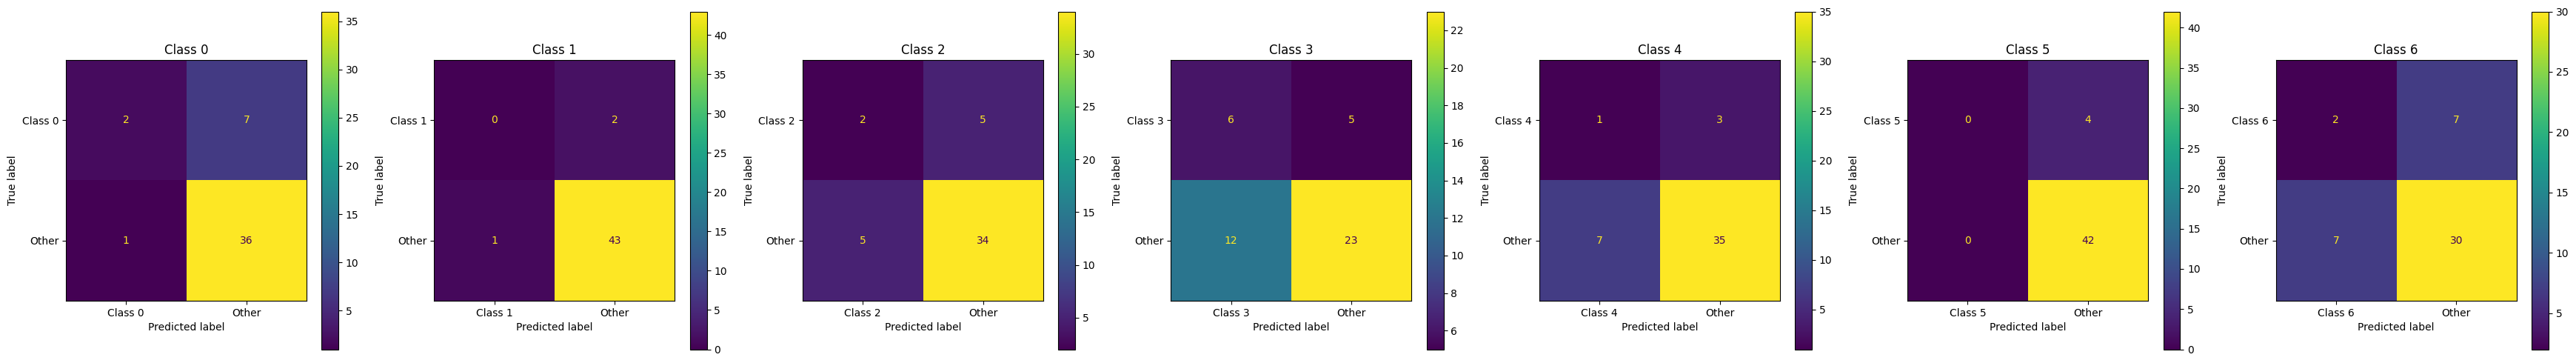

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

model2save = load_model('my_model2.h5')

y_pred = model2save.predict(x_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the overall confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Find the total number of unique classes
num_classes = len(np.unique(y_test_labels))

# Setup a subplot grid of appropriate size
f, axes = plt.subplots(1, num_classes, figsize=(num_classes * 5, 5))
axes = axes.ravel()

for i in range(num_classes):
    # Construct a 2x2 confusion matrix for each class
    tp = cm[i, i]
    fn = np.sum(cm[i, :]) - tp
    fp = np.sum(cm[:, i]) - tp
    tn = np.sum(cm) - (tp + fn + fp)
    cm_class = np.array([[tp, fn], [fp, tn]])

    # Display the confusion matrix for the current class
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_class, display_labels=[f'Class {i}', f'Other'])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'Class {i}')

plt.tight_layout()
plt.show()


(46, 256, 256, 3)
2/2 [==============================] - 1s 210ms/step
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 

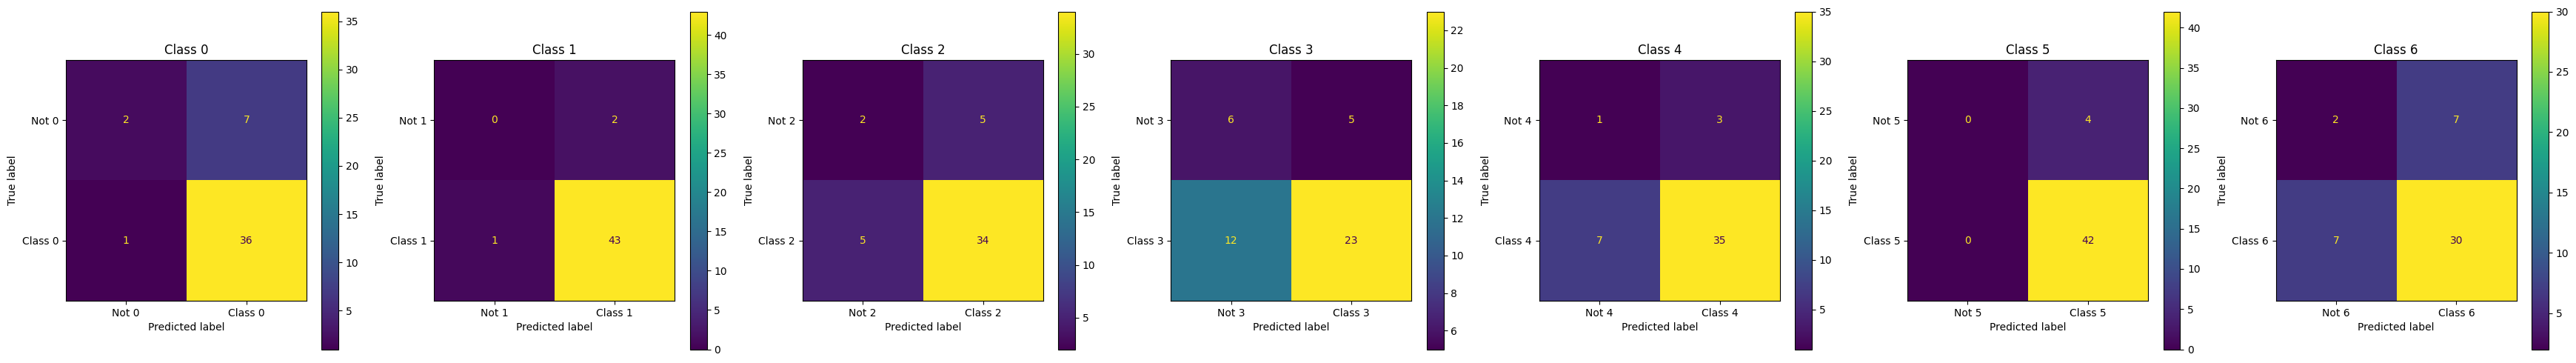

In [13]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print(x_test.shape)
# print(x_train.shape)
# print(y_test.shape)
# print(y_train.shape)

model2save = load_model('my_model2.h5')

y_pred = model2save.predict(x_test)
# print(y_pred.shape)
# print(y_test.shape)
# print(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print('Akurasi Testing CNN:', accuracy)
# plot_confusion_matrix(model2, x_test, y_test)

print(y_test)
print(y_pred)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Assuming y_pred_labels and y_test_labels are defined as before

# Calculate the overall confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Number of classes (adjust as needed)
num_classes = len(np.unique(y_test_labels))

# Setup a subplot grid of appropriate size
f, axes = plt.subplots(1, num_classes, figsize=(num_classes * 5, 5))
axes = axes.ravel()

for i in range(num_classes):
    # Extract the confusion matrix for the current class
    cm_class = np.array([[cm[i, i], np.sum(cm[i, :]) - cm[i, i]],
                         [np.sum(cm[:, i]) - cm[i, i], np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]]])

    # Display the confusion matrix for the current class
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_class, display_labels=[f'Not {i}', f'Class {i}'])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'Class {i}')

plt.tight_layout()
plt.show()



In [14]:
model2.evaluate(x_test,y_test)

pred = model2.predict(x_test)
print('label actual:',np.argmax(y_test[3]))
print('label prediction:',np.argmax(pred[3]))
print(y_test)
print(pred)

2/2 [==============================] - 1s 202ms/step
label actual: 6
label prediction: 3
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#model 1 menggunakan Multilayer Neural Network

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(7,activation='softmax'))


model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,epochs=750,batch_size=250,validation_data=(x_test,y_test))
model1.save('my_model.h5')

model1.evaluate(x_test,y_test)

Epoch 1/750
1/1 [==============================] - 2s 2s/step - loss: 1.9459 - acc: 0.1926 - val_loss: 1.9442 - val_acc: 0.1739
Epoch 2/750
1/1 [==============================] - 1s 840ms/step - loss: 1.9414 - acc: 0.4296 - val_loss: 1.9420 - val_acc: 0.1522
Epoch 3/750
1/1 [==============================] - 1s 871ms/step - loss: 1.9341 - acc: 0.4519 - val_loss: 1.9397 - val_acc: 0.1522
Epoch 4/750
1/1 [==============================] - 1s 889ms/step - loss: 1.9256 - acc: 0.4593 - val_loss: 1.9374 - val_acc: 0.1522
Epoch 5/750
1/1 [==============================] - 1s 791ms/step - loss: 1.9163 - acc: 0.4593 - val_loss: 1.9345 - val_acc: 0.1522
Epoch 6/750
1/1 [==============================] - 1s 838ms/step - loss: 1.9063 - acc: 0.4593 - val_loss: 1.9316 - val_acc: 0.1522
Epoch 7/750
1/1 [==============================] - 1s 822ms/step - loss: 1.8957 - acc: 0.4741 - val_loss: 1.9287 - val_acc: 0.1522
Epoch 8/750
1/1 [==============================] - 1s 738ms/step - loss: 1.8848 - acc:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 31ms/step - loss: 4.6606 - acc: 0.2391


[4.66060733795166, 0.239130437374115]

(46, 256, 256, 3)


2/2 [==============================] - 0s 27ms/step
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0

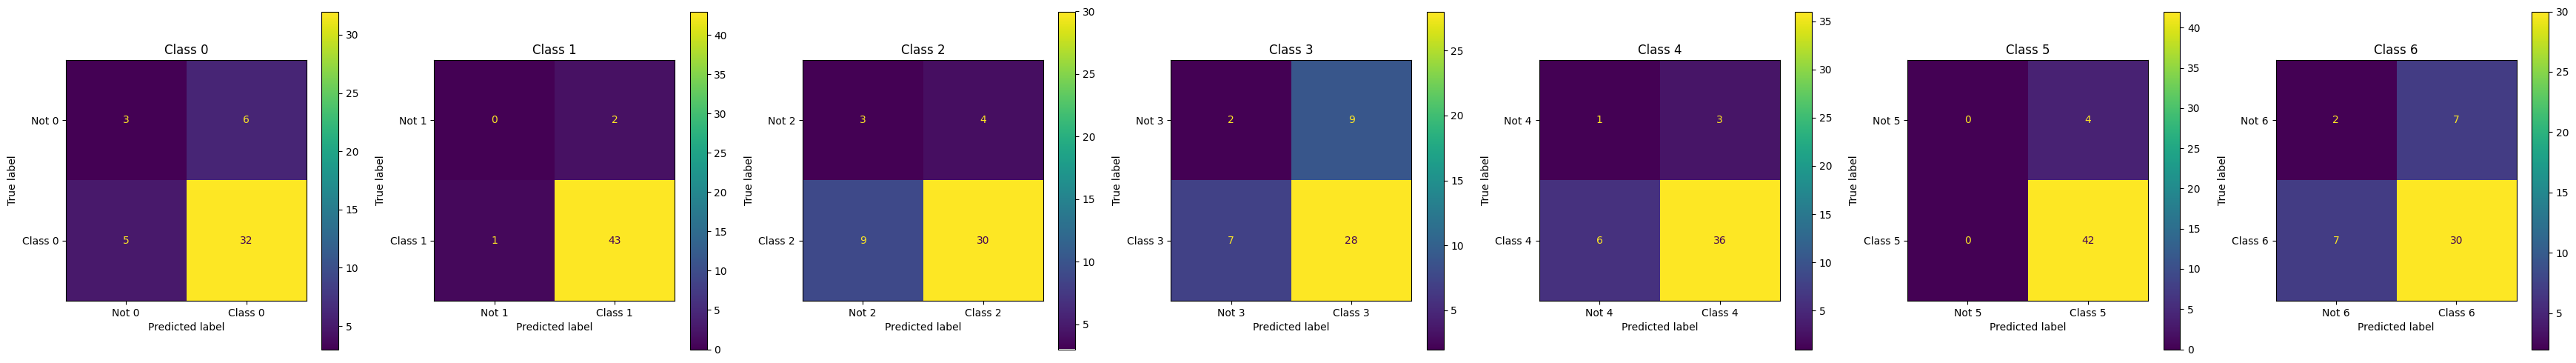

In [16]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print(x_test.shape)
# print(x_train.shape)
# print(y_test.shape)
# print(y_train.shape)

model2save = load_model('my_model.h5')

y_pred = model2save.predict(x_test)
# print(y_pred.shape)
# print(y_test.shape)
# print(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print('Akurasi Testing CNN:', accuracy)
# plot_confusion_matrix(model2, x_test, y_test)

print(y_test)
print(y_pred)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Assuming y_pred_labels and y_test_labels are defined as before

# Calculate the overall confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Number of classes (adjust as needed)
num_classes = len(np.unique(y_test_labels))

# Setup a subplot grid of appropriate size
f, axes = plt.subplots(1, num_classes, figsize=(num_classes * 5, 5))
axes = axes.ravel()

for i in range(num_classes):
    # Extract the confusion matrix for the current class
    cm_class = np.array([[cm[i, i], np.sum(cm[i, :]) - cm[i, i]],
                         [np.sum(cm[:, i]) - cm[i, i], np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]]])

    # Display the confusion matrix for the current class
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_class, display_labels=[f'Not {i}', f'Class {i}'])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'Class {i}')

plt.tight_layout()
plt.show()
